<a href="https://colab.research.google.com/github/AlexVonSchwerdtner/BA780-Team6/blob/main/Boston_Crime_Scene_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*BA780 - Team 6*
##Team Project - Exploritory Data Analysis

#**Boston Crime Scene Analytics**

###*Problem definition:*

As current students living in the Boston Area we are interested in analyzing the Boston Crime Scene. We would like to analyze and discover what types of crimes are most common, where the different types of crimes are most likely to occur, and if the frequency of crimes change over specific time spans (e.g. day, week & year). Our mission is to answer questions like “where a tourist is most likely to be a victim of a crime at a certain time of day, specific months or seasons of a given year?”

## **Data**
*Crime Incident Reports (August 2015 - To Date)*

The Data was downloaded from Analyze Boston: 

https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system

*Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred. Records in the new system begin in June of 2015.*

Each row represents a specific crime incident, each column contains crime incident attributes described as below:

* **INCIDENT_NUMBER**: Customer ID

The data set includes information about:

* ......`xxx`....


We will be using Python and Seaborn library to plot and analyze the data.

**Basic information**:
* Only 494,251 rows
* There are 20 columns with X features
* Only ... missing values.

In [ ]:
Crimes_all_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452208 entries, 0 to 452207
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      452208 non-null  object 
 1   OFFENSE_CODE         452208 non-null  int64  
 2   OFFENSE_CODE_GROUP   452208 non-null  object 
 3   OFFENSE_DESCRIPTION  452208 non-null  object 
 4   DISTRICT             449293 non-null  object 
 5   REPORTING_AREA       452208 non-null  object 
 6   SHOOTING             141721 non-null  object 
 7   OCCURRED_ON_DATE     452208 non-null  object 
 8   YEAR                 452208 non-null  int64  
 9   MONTH                452208 non-null  int64  
 10  DAY_OF_WEEK          452208 non-null  object 
 11  HOUR                 452208 non-null  int64  
 12  UCR_PART             311110 non-null  object 
 13  STREET               442052 non-null  object 
 14  Lat                  432925 non-null  float64
 15  Long             

In [ ]:
Crimes_all_years.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,...,UCR_PART,STREET,Lat,Long,Location
0,I192068249,2647,Other,THREATS TO DO BODILY HARM,B2,...,Part Two,WASHINGTON ST,42.330119,-71.084251,"(42.33011862, -71.08425106)"
1,I192061894,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,C11,...,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,Fraud,FRAUD - IMPERSONATION,A1,...,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,Fraud,FRAUD - IMPERSONATION,E18,...,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)"
4,I182090828,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,...,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)"


In [ ]:
offense_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CODE    425 non-null    int64 
 1   NAME    425 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.8+ KB


In [ ]:
offense_codes.head()

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


# **Setup**

## *Importing Required Packages*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',10)

## *Reading all files to the environment from GoogleCloudStorage Bucket*

In [ ]:
from google.cloud import storage
from google.colab import auth
auth.authenticate_user()

In [ ]:
def download_blob(project_id, bucket_name, source_blob_name, destination_file_name):
    """Downloads a blob from the bucket."""
    # project_id = "your-project-id"
    # bucket_name = "your-bucket-name"
    # source_blob_name = "storage-object-name"
    # destination_file_name = "local/path/to/file"

    storage_client = storage.Client(project_id)

    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(source_blob_name)
    blob.download_to_filename(destination_file_name)

    print(
        "Blob {} downloaded to {}.".format(
            source_blob_name, destination_file_name
        )
    )

In [ ]:
download_blob(project_id='ba-780-team6-a1', bucket_name='ba780-team6-a1', 
              source_blob_name='rmsoffensecodes.xlsx', 
              destination_file_name='rmsoffensecodes.xlsx')

Blob rmsoffensecodes.xlsx downloaded to rmsoffensecodes.xlsx.


In [ ]:
download_blob(project_id='ba-780-team6-a1', bucket_name='ba780-team6-a1', 
              source_blob_name='crime-incident-reports-2015.csv', 
              destination_file_name='crime-incident-reports-2015.csv')

Blob crime-incident-reports-2015.csv downloaded to crime-incident-reports-2015.csv.


In [ ]:
download_blob(project_id='ba-780-team6-a1', bucket_name='ba780-team6-a1', 
              source_blob_name='crime-incident-reports-2016.csv', 
              destination_file_name='crime-incident-reports-2016.csv')

In [ ]:
download_blob(project_id='ba-780-team6-a1', bucket_name='ba780-team6-a1', 
              source_blob_name='crime-incident-reports-2017.csv', 
              destination_file_name='crime-incident-reports-2017.csv')

Blob crime-incident-reports-2017.csv downloaded to crime-incident-reports-2017.csv.


In [ ]:
download_blob(project_id='ba-780-team6-a1', bucket_name='ba780-team6-a1', 
              source_blob_name='crime-incident-reports-2018.csv', 
              destination_file_name='crime-incident-reports-2018.csv')

Blob crime-incident-reports-2018.csv downloaded to crime-incident-reports-2018.csv.


In [ ]:
download_blob(project_id='ba-780-team6-a1', bucket_name='ba780-team6-a1', 
              source_blob_name='crime-incident-reports-2019.csv', 
              destination_file_name='crime-incident-reports-2019.csv')

Blob crime-incident-reports-2019.csv downloaded to crime-incident-reports-2019.csv.


In [ ]:
download_blob(project_id='ba-780-team6-a1', bucket_name='ba780-team6-a1', 
              source_blob_name='crime-incident-reports-2020.csv', 
              destination_file_name='crime-incident-reports-2020.csv')

Blob crime-incident-reports-2020.csv downloaded to crime-incident-reports-2020.csv.


In [ ]:
download_blob(project_id='ba-780-team6-a1', bucket_name='ba780-team6-a1', 
              source_blob_name='crime-incident-reports-2021.csv', 
              destination_file_name='crime-incident-reports-2021.csv')

Blob crime-incident-reports-2021.csv downloaded to crime-incident-reports-2021.csv.


## *Loading Data to variables*

In [19]:
# reading the crime data sets to the environement
crimes2015 = pd.read_csv('crime-incident-reports-2015.csv')
crimes2016 = pd.read_csv('crime-incident-reports-2016.csv')
crimes2017 = pd.read_csv('crime-incident-reports-2017.csv')
crimes2018 = pd.read_csv('crime-incident-reports-2018.csv')
crimes2019 = pd.read_csv('crime-incident-reports-2019.csv')
crimes2020 = pd.read_csv('crime-incident-reports-2020.csv')
crimes2021 = pd.read_csv('crime-incident-reports-2021.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
# reading the offense codes to the environment
offense_codes = pd.read_excel('rmsoffensecodes.xlsx')

## *Concatenating all crime datasets (Years 2015 - 2021)*

In [24]:
# concatenating all crime datasets
frames = [crimes2015,crimes2016,crimes2017,crimes2018,crimes2019,crimes2020,crimes2021]
Crimes_all_years = pd.concat(frames)

In [25]:
# Checking for the most recent month
Crimes_all_years.loc[(Crimes_all_years['YEAR']==Crimes_all_years['YEAR'].max())&(Crimes_all_years['MONTH']==Crimes_all_years['MONTH'].max()) &(Crimes_all_years['DAY_OF_WEEK']==Crimes_all_years['DAY_OF_WEEK'].max())]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,...,UCR_PART,STREET,Lat,Long,Location


In [26]:
# EXPORT TO CSV
Crimes_all_years.to_csv('crimes_all_years.csv')

NameError: ignored

# **Data Cleaning**

### Data Cleaning in Offense Code Dataset

In [ ]:
# Number of unique offense codes
len(offense_codes['CODE'].unique())

425

In [ ]:
# checking for duplicates
print(len(offense_codes))
print(len(offense_codes.drop_duplicates(subset='CODE', keep='first')))

576
425


In [ ]:
offense_codes.duplicated

<bound method DataFrame.duplicated of      CODE                                       NAME
0     612           LARCENY PURSE SNATCH - NO FORCE 
1     613                        LARCENY SHOPLIFTING
2     615    LARCENY THEFT OF MV PARTS & ACCESSORIES
3    1731                                     INCEST
4    3111                  LICENSE PREMISE VIOLATION
..    ...                                        ...
571  1806  DRUGS - CLASS B TRAFFICKING OVER 18 GRAMS
572  1807  DRUGS - CLASS D TRAFFICKING OVER 50 GRAMS
573  1610    HUMAN TRAFFICKING - COMMERCIAL SEX ACTS
574  2010                              HOME INVASION
575  1620  HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE

[576 rows x 2 columns]>

In [ ]:
duplicated_codes = offense_codes[offense_codes.duplicated()]
duplicated_codes

,CODE,NAME
184,112,KILLING OF FELON BY POLICE
185,114,KILLING OF POLICE BY FELON
186,121,MANSLAUGHTER - VEHICLE - NEGLIGENCE
188,123,MANSLAUGHTER - NON-VEHICLE - NEGLIGENCE
329,724,AUTO THEFT
...,...,...
562,1849,"DRUGS - POSS CLASS B - COCAINE, ETC."
563,3119,FIREARM/WEAPON - FOUND OR CONFISCATED
564,1103,CONFIDENCE GAMES
565,2608,CHINS


In [ ]:
# dropping duplicates
offense_codes = offense_codes.drop_duplicates(subset='CODE', keep='first').reset_index(drop=True)

### Data Cleaning in Crime Dataset

In [ ]:
# Number of unique crime incidents
len(Crimes_all_years['INCIDENT_NUMBER'].unique())

452208

In [ ]:
# checking for duplicates
print(len(Crimes_all_years))
print(len(Crimes_all_years.drop_duplicates(subset='INCIDENT_NUMBER', keep='first')))

494281
452208


In [ ]:
# dropping duplicates
Crimes_all_years = Crimes_all_years.drop_duplicates(subset='INCIDENT_NUMBER', keep='first').reset_index(drop=True)

In [ ]:
# filling the NA's in the 'OFFENSE_CODE_GROUP' to "Other"
Crimes_all_years['OFFENSE_CODE_GROUP']= Crimes_all_years['OFFENSE_CODE_GROUP'].fillna("Other")

In [ ]:
Crimes_all_years.isna().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 2915
                        ...  
UCR_PART               141098
STREET                  10156
Lat                     19283
Long                    19283
Location                    0
Length: 17, dtype: int64

In [ ]:
# missing values in Lat column
Crimes_all_years[Crimes_all_years['Lat'].isnull()]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,...,UCR_PART,STREET,Lat,Long,Location
13,I182039429,1107,Fraud,FRAUD - IMPERSONATION,C6,...,Part Two,E FOURTH ST,NaN,NaN,"(0.00000000, 0.00000000)"
42,I172061344,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,...,Part Two,COURT ST,NaN,NaN,"(0.00000000, 0.00000000)"
78,I162101249,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,E18,...,Part Two,CUMMINS HWY,NaN,NaN,"(0.00000000, 0.00000000)"
86,I162097933,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,E5,...,Part Two,ADDELAIDE PL,NaN,NaN,"(0.00000000, 0.00000000)"
106,I162083921,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,...,Part Two,CLARENDON ST,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...,...,...,...,...,...,...,...,...
311094,I182000010,3802,Motor Vehicle Accident Response,M/V ACCIDENT - PROPERTY DAMAGE,B3,...,Part Three,CUMMINS HWY,NaN,NaN,"(0.00000000, 0.00000000)"
311098,I172107333,724,Auto Theft,AUTO THEFT,A1,...,Part One,BOYLSTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
311147,I172022524,3125,Warrant Arrests,WARRANT ARREST,A1,...,Part Three,BOYLSTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
311153,I172002908,802,Simple Assault,ASSAULT SIMPLE - BATTERY,A1,...,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"


In [ ]:
# missing values in Long column
Crimes_all_years[Crimes_all_years['Long'].isnull()]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,...,UCR_PART,STREET,Lat,Long,Location
13,I182039429,1107,Fraud,FRAUD - IMPERSONATION,C6,...,Part Two,E FOURTH ST,NaN,NaN,"(0.00000000, 0.00000000)"
42,I172061344,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,...,Part Two,COURT ST,NaN,NaN,"(0.00000000, 0.00000000)"
78,I162101249,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,E18,...,Part Two,CUMMINS HWY,NaN,NaN,"(0.00000000, 0.00000000)"
86,I162097933,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,E5,...,Part Two,ADDELAIDE PL,NaN,NaN,"(0.00000000, 0.00000000)"
106,I162083921,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,...,Part Two,CLARENDON ST,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...,...,...,...,...,...,...,...,...
311094,I182000010,3802,Motor Vehicle Accident Response,M/V ACCIDENT - PROPERTY DAMAGE,B3,...,Part Three,CUMMINS HWY,NaN,NaN,"(0.00000000, 0.00000000)"
311098,I172107333,724,Auto Theft,AUTO THEFT,A1,...,Part One,BOYLSTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
311147,I172022524,3125,Warrant Arrests,WARRANT ARREST,A1,...,Part Three,BOYLSTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
311153,I172002908,802,Simple Assault,ASSAULT SIMPLE - BATTERY,A1,...,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"


In [ ]:
# missing values in DISTRICT column
Crimes_all_years[Crimes_all_years['DISTRICT'].isnull()]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,...,UCR_PART,STREET,Lat,Long,Location
9,I182061268,3201,Property Lost,PROPERTY - LOST,NaN,...,Part Three,BERNARD,-1.000000,-1.000000,"(-1.00000000, -1.00000000)"
20,I182008210,1107,Fraud,FRAUD - IMPERSONATION,NaN,...,Part Two,COBDEN,-1.000000,-1.000000,"(-1.00000000, -1.00000000)"
1630,I152106585,2907,Violations,VAL - OPERATING AFTER REV/SUSP.,NaN,...,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
2673,I152105266,724,Auto Theft,AUTO THEFT,NaN,...,Part One,MARLBOROUGH,NaN,NaN,"(0.00000000, 0.00000000)"
2711,I152105224,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",NaN,...,Part Two,DORCHESTER AVE,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...,...,...,...,...,...,...,...,...
452087,210366869,1402,Other,VANDALISM,NaN,...,NaN,SCHOOL ST & TREMONT ST\nBOSTON MA 02111\nUNIT...,0.000000,0.000000,"(0, 0)"
452154,210176632,3018,Other,SICK/INJURED/MEDICAL - POLICE,NaN,...,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
452159,210140992,3805,Other,M/V ACCIDENT - POLICE VEHICLE,NaN,...,NaN,BOYLSTON ST.,42.351571,-71.071866,"(42.3515707556266, -71.0718659907746)"
452184,210026907,1832,Other,SICK ASSIST - DRUG RELATED ILLNESS,NaN,...,NaN,POMPEII ST,42.329695,-71.070444,"(42.3296947119465, -71.0704440989647)"


# **Exploration**

In [ ]:
dftop5 = Crimes_all_years.groupby('OFFENSE_CODE_GROUP', level=allbut('Other')).size().to_frame('count').sort_values(by='count', ascending=False).head(5).reset_index()
dftop5

NameError: ignored

In [ ]:
# number of crimes over offense groups by year

df = Crimes_all_years.groupby(['YEAR','OFFENSE_CODE_GROUP'])['INCIDENT_NUMBER'].count().reset_index()
df = df.sort_values(by=['YEAR','INCIDENT_NUMBER'], ascending=False)
df = df[df['OFFENSE_CODE_GROUP'].isin(dftop5.OFFENSE_CODE_GROUP)]

df

,YEAR,OFFENSE_CODE_GROUP,INCIDENT_NUMBER
251,2021,Other,50352
250,2020,Other,70894
249,2019,Other,19782
225,2018,Motor Vehicle Accident Response,11229
222,2018,Medical Assistance,8065
...,...,...,...
36,2015,Motor Vehicle Accident Response,5612
28,2015,Larceny,4597
33,2015,Medical Assistance,3084
39,2015,Other,2731


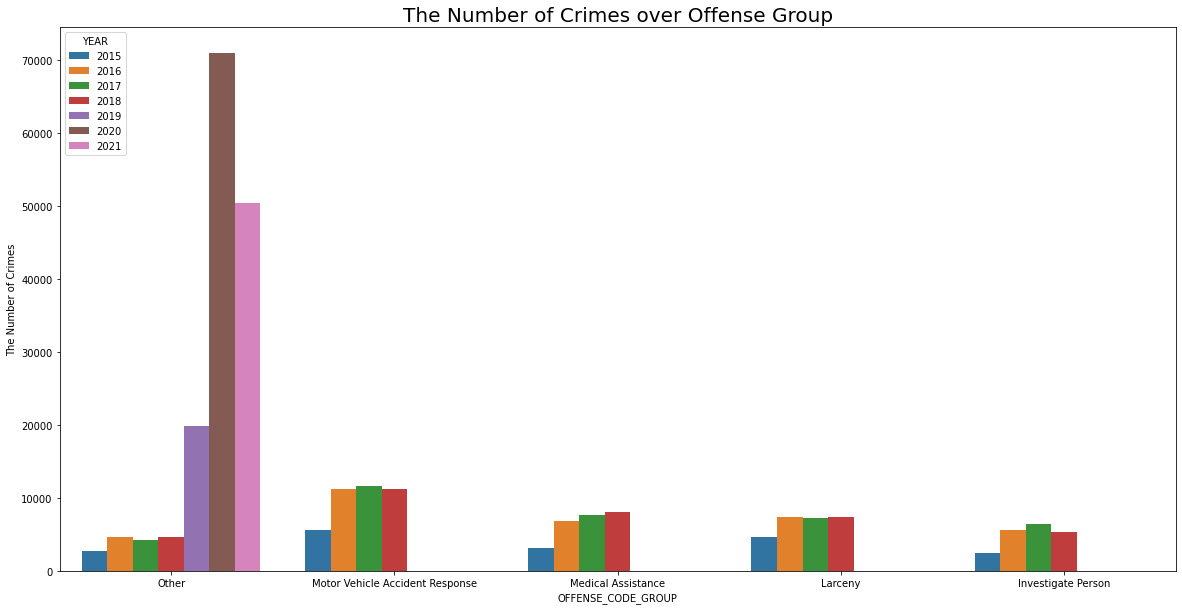

In [ ]:
plt.figure(figsize= (20,10))
sns.barplot(data=df, x='OFFENSE_CODE_GROUP', y='INCIDENT_NUMBER', hue='YEAR')
plt.ylabel('The Number of Crimes')
plt.title('The Number of Crimes over Offense Group', fontsize=20)
plt.show()

In [ ]:
# took data only year is 2015. Just for interest and not not freeze kernel while map visualization
df1_part = df1[df1['YEAR'] == 2015]
df1_2015=df1_part.copy()
df1_2015 = df1_2015.groupby('OFFENSE_CODE_GROUP')['INCIDENT_NUMBER'].count().reset_index()
df1_2015=df1_2015.sort_values(by='INCIDENT_NUMBER', ascending=False)[:10]
df1_2015

NameError: ignored

## By Hour and Weekday

In [ ]:
crimes_hour = Crimes_all_years.groupby('HOUR')['index'].agg(count='count')
crimes_hour = pd.DataFrame({'HOUR':crimes_hour.index,'COUNT':crimes_hour['count']})
ax = sns.barplot(x=crimes_hour.HOUR,y=crimes_hour.COUNT)
sns.set_context({"figure.figsize":(10,10)})
ax.set_title('Count of Crimes by Hour');

In [ ]:
crimes_weekday = Crimes_all_years.groupby('DAY_OF_WEEK')['index'].agg(count='count')
crimes_weekday = crimes_weekday.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
crimes_weekday = pd.DataFrame({'DAY_OF_WEEK':crimes_weekday.index,'COUNT':crimes_weekday['count']})
ax = sns.barplot(x=crimes_weekday.DAY_OF_WEEK,y=crimes_weekday.COUNT)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                textcoords='offset points')
ax.set(ylim=(60000, 76000))
sns.set_context({"figure.figsize":(10,10)})
ax.set_title('Count of Crimes by Day_of_week');

In [ ]:
crimes_weekday_hour = Crimes_all_years.groupby(['DAY_OF_WEEK','HOUR'])['index'].aggregate('count').unstack()
crimes_weekday_hour = crimes_weekday_hour.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.set_context({"figure.figsize":(20,20)})
ax = sns.heatmap(crimes_weekday_hour,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Crime Count by Day_of_week and Hour');

## By Season

In [ ]:
Crimes_all_years['SEASON']=None
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([3,4,5]),'SEASON']='Spring'
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([6,7,8]),'SEASON']='Summer'
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([9,10,11]),'SEASON']='Fall'
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([12,1,2]),'SEASON']='Winter'
crimes_season = Crimes_all_years.groupby('SEASON')['index'].agg(count='count')
crimes_season = crimes_season.reindex(['Spring','Summer','Fall','Winter'])
crimes_season = pd.DataFrame({'SEASON':crimes_season.index,'COUNT':crimes_season['count']})
ax = sns.barplot(x=crimes_season.SEASON,y=crimes_season.COUNT)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                textcoords='offset points')
ax.set(ylim=(100000, 145000))
sns.set_context({"figure.figsize":(10,10)})
ax.set_title('Count of Crimes by Season');

In [ ]:
crimes_season_hour = Crimes_all_years.groupby(['SEASON','HOUR'])['index'].aggregate('count').unstack()
crimes_season_hour = crimes_season_hour.reindex(['Spring','Summer','Fall','Winter'])
sns.set_context({"figure.figsize":(20,20)})
ax = sns.heatmap(crimes_season_hour,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.15}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Crime Count by Season and Hour');

## By Year

In [ ]:
crimes_year = Crimes_all_years.groupby('YEAR')['index'].agg(count='count')
crimes_year = pd.DataFrame({'YEAR':crimes_year.index,'COUNT':crimes_year['count']})
sns.set_context({"figure.figsize":(10,10)})
ax = sns.barplot(x=crimes_year.YEAR,y=crimes_year.COUNT)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                textcoords='offset points')
ax.set(ylim=(0, 110000))
ax.set_title('Count of Crimes by Year');

## By Offence Type

Because offence types are only specified in OFFENSE_DESCRIPTION where OFFENSE_CODE_GROUP is 'other' since 2019, therefore the cleaned general office types are saved in the TYPE column.

In [ ]:
Crimes_all_years['TYPE']=''
def check(s):
    s=s.lower()
    if s.find('m/v') > -1:
        s =  'motor vehicle accident response'
    elif s.find('liquor/alcohol')>-1:
        s = 'liquor/alcohol'
    elif s.find('/') >= 0 or s.find('-') >= 0 or s.find('(') >= 0:
        while s.find('/') >= 0 or s.find('-') >= 0 or s.find('(') >= 0:
            if (s.find('/') > 0 and s.find('-') > 0 and s.find('(') > 0):
                a = min(s.find('/'),s.find('-')-1,s.find('(')-1)
            elif s.find('(') > 0:
                a = s.find('(') -1
            elif s.find('-') > 0:
                a = s.find('-') -1
            elif s.find('/') > 0:
                a = s.find('/')
            s = s[:a]
    return s
Crimes_all_years.loc[Crimes_all_years['YEAR']>2018,'TYPE']=Crimes_all_years.loc[Crimes_all_years['YEAR']>2018,'OFFENSE_DESCRIPTION']
Crimes_all_years.loc[Crimes_all_years['YEAR']>2018,'TYPE']=Crimes_all_years[Crimes_all_years['YEAR']>2018]['TYPE'].apply(lambda x:check(x))
Crimes_all_years.loc[Crimes_all_years['YEAR']<2019,'TYPE']=Crimes_all_years[Crimes_all_years['YEAR']<2019]['OFFENSE_CODE_GROUP'].apply(lambda x:check(x))

In [ ]:
crimes_offence = Crimes_all_years.groupby('TYPE')['index'].agg(count='count').sort_values(by='count',ascending=False)
crimes_offence = pd.DataFrame({'OFFENSE_TYPE':crimes_offence.index,'COUNT':crimes_offence['count']})
sns.set_context({"figure.figsize":(10,30)})
ax = sns.barplot(y=crimes_offence.OFFENSE_TYPE,x=crimes_offence.COUNT);
ax.set_title('Count of Crime by TYPE');

In [ ]:
def my_autopct(pct):
    return ('%1.1f' % pct) if pct > 1 else ''

def get_new_labels(sizes, labels):
    new_labels = [label if size > 1 else '' for size, label in zip(sizes, labels)]
    return new_labels

fig, ax = plt.subplots()
_,_,_ = ax.pie(crimes_offence, labels=get_new_labels(crimes_offence,crimes_offence.index), colors='rainbow', autopct=my_autopct, startangle=90, rotatelabels=False)

In [ ]:
sum = crimes_offence['COUNT'].sum()
def lab(s,i):
    if i/sum > 0.05:
        return s
    else:
        return ''
plt.pie(crimes_offence['COUNT'], labels = [crimes_offence.index if crimes_offence['COUNT'] > 0.05 * sum else ''], startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')

In [ ]:
crimes_weekday_hour = Crimes_all_years[Crimes_all_years['TYPE'] == 'motor vehicle accident response'].groupby(['DAY_OF_WEEK','HOUR'])['index'].aggregate('count').unstack()
crimes_weekday_hour = crimes_weekday_hour.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.set_context({"figure.figsize":(20,20)})
ax = sns.heatmap(crimes_weekday_hour,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Motor Vehicle Accident Response Count by Day_of_week and Hour');

In [ ]:
crimes_weekday_hour = Crimes_all_years[Crimes_all_years['TYPE'] == 'investigate person'].groupby(['DAY_OF_WEEK','HOUR'])['index'].aggregate('count').unstack()
crimes_weekday_hour = crimes_weekday_hour.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.set_context({"figure.figsize":(20,20)})
ax = sns.heatmap(crimes_weekday_hour,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Investigate Person Count by Day_of_week and Hour');

In [62]:
#Offense_group = Crimes_all_years['OFFENSE_CODE'].value_counts()
new = Crimes_all_years[['OFFENSE_CODE','YEAR','OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION']].copy()

Line Chart

In [ ]:
crimes_weekday_hour = Crimes_all_years.groupby(['HOUR','YEAR'])['index'].aggregate(COUNT = 'count')
sns.set_context({"figure.figsize":(10,10)})
sns.lineplot(data=crimes_weekday_hour,x='HOUR',y='COUNT',hue='YEAR');

In [ ]:
crimes_district_year = Crimes_all_years.groupby(['YEAR','DISTRICT'])['index'].aggregate(COUNT = 'count')
crimes_district_year

In [ ]:
sns.set_context({"figure.figsize":(10,10)})
sns.lineplot(data=crimes_district_hour,x='YEAR',y='COUNT',hue='DISTRICT');

In [ ]:
crimes_weekday_hour = Crimes_all_years[Crimes_all_years['TYPE'] == 'larceny'].groupby(['DAY_OF_WEEK','HOUR'])['index'].aggregate('count').unstack()
crimes_weekday_hour = crimes_weekday_hour.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.set_context({"figure.figsize":(20,20)})
ax = sns.heatmap(crimes_weekday_hour,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Larceny by Day_of_week and Hour');

In [ ]:
Crimes_all_years[Crimes_all_years['TYPE'] == 'motor vehicle accident response'].groupby('STREET')['index'].agg(count='count').sort_values(by='count',ascending=False).head(5)

In [ ]:
Crimes_all_years[Crimes_all_years['TYPE'] == 'larceny'].groupby('STREET')['index'].agg(count='count').sort_values(by='count',ascending=False).head(5)

In [ ]:
Crimes_all_years[Crimes_all_years['TYPE'] == 'vandalism'].groupby('STREET')['index'].agg(count='count').sort_values(by='count',ascending=False).head(5)

## Analysis on Street

In [ ]:
street_rank = Crimes_all_years.groupby('STREET')['index'].agg(count='count').sort_values(by='count',ascending=False)[:10]

In [ ]:
crimes_street_hour = Crimes_all_years[Crimes_all_years['STREET'].isin(street_rank.index)].groupby(['STREET','HOUR'])['index'].aggregate('count').unstack().reindex(list(street_rank.index))
sns.set_context({"figure.figsize":(20,20)})
ax = sns.heatmap(crimes_street_hour,square=True,annot=False,fmt="d",cmap="rainbow",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Larceny by Day_of_week and Hour');

## Analysis on District 

In [ ]:
gm=pd.DataFrame({'District':Crime_all_years['DISTRICT'],'Year':Crime_all_years['YEAR']})
ax=gm.groupby(['District','Year']).agg({'Year':'count'})
ap = ax.unstack(level=0).plot(kind='line', subplots=True, rot=0, layout=(7,2) )
plt.tight_layout()

In [ ]:

crimes_District_year = Crimes_all_years.groupby(['DISTRICT','YEAR'])['index'].aggregate('count').unstack()
crimes_District_year = crimes_District_year.reindex(['B2', 'C11', 'A1', 'E18', 'D4', 'B3', 'C6', 'D14', 'A7', 'E5',
       'E13', 'A15', 'External'])
ax = sns.heatmap(crimes_District_year,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of District by Year')

In [ ]:

crimes_District_month = Crimes_all_years.groupby(['DISTRICT','MONTH'])['index'].aggregate('count').unstack()
crimes_District_month = crimes_District_year.reindex(['B2', 'C11', 'A1', 'E18', 'D4', 'B3', 'C6', 'D14', 'A7', 'E5',
       'E13', 'A15', 'External'])
ax = sns.heatmap(crimes_District_month,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of District by Month')

In [ ]:

crimes_District_season = Crimes_all_years.groupby(['DISTRICT','SEASON'])['index'].aggregate('count').unstack()
crimes_District_season = crimes_District_season.reindex(['B2', 'C11', 'A1', 'E18', 'D4', 'B3', 'C6', 'D14', 'A7', 'E5',
       'E13', 'A15', 'External'])
ax = sns.heatmap(crimes_District_season,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of District by Season')


In [ ]:

crimes_District_weeksdays = Crimes_all_years.groupby(['DAY_OF_WEEK','DISTRICT'])['index'].aggregate('count').unstack()
crimes_District_weeksdays = crimes_District_weeksdays.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax = sns.heatmap(crimes_District_weeksdays,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of District by day of week')

In [ ]:
Crimes_all_years['Holiday']=None
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([12]),'Holiday']=1
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([1,2,3,4,5,6,7,8,9,10,11]),'Holiday']=0
Crime_all_years.info()

In [ ]:
mydate=Crime_all_years['OCCURRED_ON_DATE']
DATE = []

for date in mydate:
    year = int(date[:4])
    month = int(date[5:7])
    day = int(date[8:10])
    DATE.append([year, month, day])
    

Crime_all_years['DATE']=DATE

Holiday=[]

month=Crime_all_years['MONTH']
day=Crime_all_years['DAY']
for var in month:
  if var ==12:
   for d in day:
     if d == 24:
      Holiday.append(1)
     else:
      Holiday.append(0)


## Mark Cluster Map

In [28]:
df=pd.read_csv("/content/crimes_all_years.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,3,7,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
df1 = df.sort_values(by='DISTRICT')

In [30]:
limit = 200
df1 = df1.iloc[0:limit, :]

In [32]:
df1=df1.dropna(subset=['Long'])
df=df.dropna(subset=['Lat'])

In [33]:
latitude = 42.3601
longitude = -71.0589
boston_map = folium.Map(location=[latitude, longitude], zoom_start=12)
boston_map

In [34]:
incidents = folium.map.FeatureGroup()
for lat, lng, in zip(df1.Lat, df1.Long):
 incidents.add_child(
 folium.CircleMarker(
 [lat, lng],
 radius=5, 
 color='yellow',
 fill=True,
 fill_color='blue',
 fill_opacity=0.6
 )
)
boston_map.add_child(incidents)

In [35]:
incidents = folium.map.FeatureGroup()
for lat, lng, code,year in zip(df1.Lat, df1.Long,df1.OFFENSE_CODE_GROUP,df1.YEAR):
 incidents.add_child(
 folium.CircleMarker(
 [lat, lng],
 radius=5, 
 color='yellow',
 fill=True,
 fill_color='red',
 fill_opacity=0.6
   )
 )
latitudes = list(df1.Lat)
longitudes = list(df1.Long)
labels = list(df1.OFFENSE_CODE_GROUP)
years=list(df1.YEAR)
for lat, lng, labels,year in zip(latitudes, longitudes, labels,years):
  folium.Marker([lat, lng], popup='{}, {}'.format(labels,year)).add_to(boston_map) 
 

boston_map.add_child(incidents)
 

In [36]:
from folium import plugins
boston_map = folium.Map(location = [latitude, longitude], zoom_start = 12)
incidents = plugins.MarkerCluster().add_to(boston_map)
for lat, lng, label,year in zip(df1.Lat, df1.Long, df1.OFFENSE_CODE_GROUP,df1.YEAR):
 folium.Marker(
 location=[lat, lng],
 icon=None,
 popup='{}, {}'.format(label,year),
 ).add_to(incidents)
# display map
boston_map